# Preliminary: Import Packages

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as py     
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import plotly.colors as pc
import matplotlib.pyplot as plt
import random
from datetime import datetime
from datetime import date
import scipy.stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Pre-Calculation and Visualization

## CryptoPunk Daily Average Price Caluculation and Visualization

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/iamyufan/cryptopunks-vis/main/data/database/tx_db.csv',index_col=0)

In [3]:
data

,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url
0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...
...,...,...,...,...,...,...,...,...,...,...,...,...
17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...
17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...


In [4]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.sort_values(by='date')

,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url
0,2017-06-23,1406,1218,0.030,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
30,2017-06-23,1406,1218,0.116,8781,Human,Male,Light,4,"['Frown', 'Big Shades', 'Shadow Beard', 'Knitt...",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...
29,2017-06-23,1406,166,0.010,3134,Human,Male,Medium,3,"['Gold Chain', 'Crazy Hair', 'Regular Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
28,2017-06-23,166,4722,0.100,5056,Human,Male,Albino,4,"['Beanie', 'Luxurious Beard', 'Earring', 'VR']",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
26,2017-06-23,1406,1218,0.060,6208,Human,Male,Medium,2,"['Shadow Beard', 'Earring']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
...,...,...,...,...,...,...,...,...,...,...,...,...
12450,2022-07-26,980,1939,94.000,9099,Human,Male,Light,4,"['Cigarette', 'Mustache', 'Earring', 'Crazy Ha...",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...
17440,2022-07-26,5318,4950,69.000,4430,Human,Female,Albino,2,"['Clown Eyes Green', 'Frumpy Hair']",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
17613,2022-07-26,3002,1044,94.900,5600,Human,Male,Albino,3,"['Frumpy Hair', 'Gold Chain', 'Small Shades']",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
13214,2022-07-27,3096,1028,69.690,6221,Human,Female,Dark,4,"['Green Eye Shadow', 'Half Shaved', 'Earring',...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...


In [5]:
eth_price_mean = data.groupby('date')['eth_price'].mean()
price = eth_price_mean.to_frame()
price

,eth_price
date,
2017-06-23,0.122588
2017-06-24,0.210353
2017-06-25,0.145562
2017-06-26,0.164000
2017-06-27,0.280132
...,...
2022-07-22,88.500000
2022-07-23,99.000000
2022-07-25,68.400000


In [6]:
price_new = price['2017-06-23':'2021-06-23']
price_new

,eth_price
date,
2017-06-23,0.122588
2017-06-24,0.210353
2017-06-25,0.145562
2017-06-26,0.164000
2017-06-27,0.280132
...,...
2021-06-19,16.495000
2021-06-20,15.415000
2021-06-21,17.780000


In [7]:
price_new = price_new.reset_index(drop=False)
price_new

,date,eth_price
0,2017-06-23,0.122588
1,2017-06-24,0.210353
2,2017-06-25,0.145562
3,2017-06-26,0.164000
4,2017-06-27,0.280132
...,...,...
968,2021-06-19,16.495000
969,2021-06-20,15.415000
970,2021-06-21,17.780000
971,2021-06-22,21.640714


In [8]:
fig1 = make_subplots()
fig1.add_trace(go.Scatter(x=price_new['date'], y=price_new['eth_price'],
              mode='lines', name='Price'))

fig1.update_layout(title='2017-2021 CryptoPunk Daily Average Price' ,autosize=True,)

py.iplot(fig1)

## Sentiment Score Import and Visualization

In [9]:
newscore = pd.read_csv("https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/analyzed_sentiment%20score/tweets_SentimentScore_new.csv",index_col=0)
newscore.head()

,day,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets
0,17-08-09,0,0,1,1
1,17-08-10,1,0,0,1
2,17-08-12,0,0,1,1
3,17-08-14,0,1,0,1
4,17-08-17,0,0,1,1


In [10]:
newscore['day'] = pd.to_datetime(newscore['day'], format='%y-%m-%d')
newscore.sort_values(by='day')
newscore

,day,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets
0,2017-08-09,0,0,1,1
1,2017-08-10,1,0,0,1
2,2017-08-12,0,0,1,1
3,2017-08-14,0,1,0,1
4,2017-08-17,0,0,1,1
...,...,...,...,...,...
524,2021-07-18,2,2,23,27
525,2021-07-19,6,1,32,39
526,2021-07-20,4,1,26,31
527,2021-07-21,6,4,23,33


In [11]:
newscore = newscore.rename(columns={'day':'date'})
newscore

,date,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets
0,2017-08-09,0,0,1,1
1,2017-08-10,1,0,0,1
2,2017-08-12,0,0,1,1
3,2017-08-14,0,1,0,1
4,2017-08-17,0,0,1,1
...,...,...,...,...,...
524,2021-07-18,2,2,23,27
525,2021-07-19,6,1,32,39
526,2021-07-20,4,1,26,31
527,2021-07-21,6,4,23,33


In [12]:
fig2 = make_subplots()
fig2.add_trace(go.Scatter(x=newscore['date'], y=newscore['sentiment_pos'],
              mode='lines', name='Positive'))
fig2.add_trace(go.Scatter(x=newscore['date'], y=newscore['sentiment_neg'],
              mode='lines', name='Negative'))
fig2.update_layout(title='2017-2021 Twitter Sentiment Score' ,autosize=True,)

py.iplot(fig2)

In [13]:
fig3 = make_subplots()
fig3.add_trace(go.Scatter(x=price_new['date'], y=price_new['eth_price'],
              mode='lines', name='Price'))
fig3.add_trace(go.Scatter(x=newscore['date'], y=newscore['sentiment_pos'],
              mode='lines', name='Positive'))
fig3.add_trace(go.Scatter(x=newscore['date'], y=newscore['sentiment_neg'],
              mode='lines', name='Negative'))
fig3.update_layout(title='CryptoPunk Sentiment Score and Price Comparison' ,autosize=True,)

py.iplot(fig3)

## Sentiment Score Polarity Calculation and Visualization

In [14]:
newscore['polarity']=(newscore['sentiment_pos']-newscore['sentiment_neg'])/(newscore['sentiment_pos']+newscore['sentiment_neg'])
newscore

,date,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets,polarity
0,2017-08-09,0,0,1,1,NaN
1,2017-08-10,1,0,0,1,1.000000
2,2017-08-12,0,0,1,1,NaN
3,2017-08-14,0,1,0,1,-1.000000
4,2017-08-17,0,0,1,1,NaN
...,...,...,...,...,...,...
524,2021-07-18,2,2,23,27,0.000000
525,2021-07-19,6,1,32,39,0.714286
526,2021-07-20,4,1,26,31,0.600000
527,2021-07-21,6,4,23,33,0.200000


In [15]:
newscore = newscore.dropna()
newscore

,date,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets,polarity
1,2017-08-10,1,0,0,1,1.000000
3,2017-08-14,0,1,0,1,-1.000000
10,2017-08-31,1,0,1,2,1.000000
11,2017-09-01,0,2,0,2,-1.000000
13,2017-09-04,0,1,0,1,-1.000000
...,...,...,...,...,...,...
524,2021-07-18,2,2,23,27,0.000000
525,2021-07-19,6,1,32,39,0.714286
526,2021-07-20,4,1,26,31,0.600000
527,2021-07-21,6,4,23,33,0.200000


In [16]:
#newscore=newscore.fillna(0)
#newscore

In [17]:
fig4 = make_subplots()
fig4.add_trace(go.Scatter(x=price_new['date'], y=price_new['eth_price'],
              mode='lines', name='Price'))
fig4.add_trace(go.Scatter(x=newscore['date'], y=newscore['polarity'],
              mode='lines', name='Sentiment Score'))

fig4.update_layout(title='CryptoPunk Sentiment Polarity and Price Comparison' ,autosize=True,)

py.iplot(fig4)

## CryptoPunk Tweets Number

In [18]:
a = pd.read_csv("https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/queried_tweets/tweets_CryptoPunk_2017-2018.csv",index_col=0)

In [19]:
b = pd.read_csv("https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/queried_tweets/tweets_CryptoPunk_2018-2019.csv",index_col=0)

In [20]:
c = pd.read_csv("https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/queried_tweets/tweets_CryptoPunk_2019-2020.csv",index_col=0)

In [21]:
d = pd.read_csv("https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/queried_tweets/tweets_CryptoPunk_2020-2021.csv",index_col=0)

In [22]:
file = [a, b, c, d]
train = pd.concat(file)
train.to_csv("tweets_2017-2021" + ".csv", index=0, sep=',')
new_tweets = pd.read_csv('tweets_2017-2021.csv')

In [23]:
new_tweets

,Date,Tweets
0,2018-06-08 10:54:24+00:00,Cryptage – blockchain games in a cryptopunk wo...
1,2018-05-21 19:17:07+00:00,I need #HTMLcoin $html @HTMLCOIN https://t.co/...
2,2018-05-21 00:35:34+00:00,Deep. https://t.co/7jav7DWyXF
3,2018-05-16 00:12:26+00:00,Hey great fuking job with @CryptoStreetPod @Cr...
4,2018-05-15 20:06:05+00:00,Now PostCSS website uses HTTPS. Glory to crypt...
...,...,...
3927,2020-08-08 13:34:59+00:00,Check out one of the coolest #cryptopunk colle...
3928,2020-08-03 16:07:13+00:00,Never owned a @larvalabs #cryptopunk but now I...
3929,2020-07-15 22:34:21+00:00,#cryptopunk
3930,2020-07-15 20:48:25+00:00,"We are giving back 2,000 #NFTs to random addre..."


In [24]:
new_tweets['Date'] = pd.to_datetime(new_tweets['Date'], format='%Y-%m-%d')
new_tweets = new_tweets.rename(columns={'Date':'date'})
new_tweets

,date,Tweets
0,2018-06-08 10:54:24+00:00,Cryptage – blockchain games in a cryptopunk wo...
1,2018-05-21 19:17:07+00:00,I need #HTMLcoin $html @HTMLCOIN https://t.co/...
2,2018-05-21 00:35:34+00:00,Deep. https://t.co/7jav7DWyXF
3,2018-05-16 00:12:26+00:00,Hey great fuking job with @CryptoStreetPod @Cr...
4,2018-05-15 20:06:05+00:00,Now PostCSS website uses HTTPS. Glory to crypt...
...,...,...
3927,2020-08-08 13:34:59+00:00,Check out one of the coolest #cryptopunk colle...
3928,2020-08-03 16:07:13+00:00,Never owned a @larvalabs #cryptopunk but now I...
3929,2020-07-15 22:34:21+00:00,#cryptopunk
3930,2020-07-15 20:48:25+00:00,"We are giving back 2,000 #NFTs to random addre..."


In [25]:
new_tweets['date']= pd.to_datetime(new_tweets['date']).dt.floor('d')
new_tweets

,date,Tweets
0,2018-06-08 00:00:00+00:00,Cryptage – blockchain games in a cryptopunk wo...
1,2018-05-21 00:00:00+00:00,I need #HTMLcoin $html @HTMLCOIN https://t.co/...
2,2018-05-21 00:00:00+00:00,Deep. https://t.co/7jav7DWyXF
3,2018-05-16 00:00:00+00:00,Hey great fuking job with @CryptoStreetPod @Cr...
4,2018-05-15 00:00:00+00:00,Now PostCSS website uses HTTPS. Glory to crypt...
...,...,...
3927,2020-08-08 00:00:00+00:00,Check out one of the coolest #cryptopunk colle...
3928,2020-08-03 00:00:00+00:00,Never owned a @larvalabs #cryptopunk but now I...
3929,2020-07-15 00:00:00+00:00,#cryptopunk
3930,2020-07-15 00:00:00+00:00,"We are giving back 2,000 #NFTs to random addre..."


In [26]:
new_tweets.set_index(['date'], inplace=True)

In [27]:
daily_new_tweets = new_tweets.groupby(pd.Grouper(freq='D')).size()
n_new_tweets = daily_new_tweets.to_frame()
n_new_tweets = n_new_tweets.tz_localize(None)
n_new_tweets

,0
date,
2017-06-29,2
2017-06-30,0
2017-07-01,0
2017-07-02,0
2017-07-03,1
...,...
2021-06-18,9
2021-06-19,17
2021-06-20,8


In [28]:
n_new_tweets = n_new_tweets.rename(columns={0:'total_tweets'})

In [29]:
n_new_tweets = n_new_tweets.reset_index(drop=False)
n_new_tweets

,date,total_tweets
0,2017-06-29,2
1,2017-06-30,0
2,2017-07-01,0
3,2017-07-02,0
4,2017-07-03,1
...,...,...
1450,2021-06-18,9
1451,2021-06-19,17
1452,2021-06-20,8
1453,2021-06-21,12


# Prepare the Y Variable: Price

## Prepare the Y Varible for Regression

In [30]:
price_new.head()

,date,eth_price
0,2017-06-23,0.122588
1,2017-06-24,0.210353
2,2017-06-25,0.145562
3,2017-06-26,0.164000
4,2017-06-27,0.280132


In [31]:
price_new.columns

Index(['date', 'eth_price'], dtype='object')

In [32]:
price_new.dtypes

date         datetime64[ns]
eth_price           float64
dtype: object

In [33]:
price_new['Daily Return'] = price_new['eth_price'].pct_change()
price_new.head()

,date,eth_price,Daily Return
0,2017-06-23,0.122588,NaN
1,2017-06-24,0.210353,0.715931
2,2017-06-25,0.145562,-0.308012
3,2017-06-26,0.164000,0.126672
4,2017-06-27,0.280132,0.708120


In [34]:
price_new['Daily Return']=pd.to_numeric(price_new['Daily Return'])
price_new.dtypes

date            datetime64[ns]
eth_price              float64
Daily Return           float64
dtype: object

## Prepare the Y Varible for Classification

In [35]:
cut = 0 #@param {type:"number"}

In [36]:
price_new['Positive'] = price_new['Daily Return'] >= cut
price_new.head()

,date,eth_price,Daily Return,Positive
0,2017-06-23,0.122588,NaN,False
1,2017-06-24,0.210353,0.715931,True
2,2017-06-25,0.145562,-0.308012,False
3,2017-06-26,0.164000,0.126672,True
4,2017-06-27,0.280132,0.708120,True


In [37]:
price_new.loc[(price_new['Daily Return'] >= cut), 'Positive'] = 1
price_new.loc[(price_new['Daily Return'] <cut), 'Positive'] = 0
price_new.head()

,date,eth_price,Daily Return,Positive
0,2017-06-23,0.122588,NaN,False
1,2017-06-24,0.210353,0.715931,1
2,2017-06-25,0.145562,-0.308012,0
3,2017-06-26,0.164000,0.126672,1
4,2017-06-27,0.280132,0.708120,1


# Prepare the X Variable: Sentiment Score

In [38]:
newscore

,date,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets,polarity
1,2017-08-10,1,0,0,1,1.000000
3,2017-08-14,0,1,0,1,-1.000000
10,2017-08-31,1,0,1,2,1.000000
11,2017-09-01,0,2,0,2,-1.000000
13,2017-09-04,0,1,0,1,-1.000000
...,...,...,...,...,...,...
524,2021-07-18,2,2,23,27,0.000000
525,2021-07-19,6,1,32,39,0.714286
526,2021-07-20,4,1,26,31,0.600000
527,2021-07-21,6,4,23,33,0.200000


# Data Consolidation

## Sentiment Score and Price

In [39]:
price_new.set_index(['date'], inplace=True)

In [40]:
newscore.set_index(['date'], inplace=True)

In [41]:
df=price_new.join(newscore)
df

,eth_price,Daily Return,Positive,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets,polarity
date,,,,,,,,
2017-06-23,0.122588,NaN,False,NaN,NaN,NaN,NaN,NaN
2017-06-24,0.210353,0.715931,1,NaN,NaN,NaN,NaN,NaN
2017-06-25,0.145562,-0.308012,0,NaN,NaN,NaN,NaN,NaN
2017-06-26,0.164000,0.126672,1,NaN,NaN,NaN,NaN,NaN
2017-06-27,0.280132,0.708120,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-06-19,16.495000,0.070872,1,4.0,1.0,16.0,21.0,0.600000
2021-06-20,15.415000,-0.065474,0,1.0,2.0,9.0,12.0,-0.333333
2021-06-21,17.780000,0.153422,1,2.0,3.0,14.0,19.0,-0.200000


In [42]:
df.reset_index(drop=False)

,date,eth_price,Daily Return,Positive,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets,polarity
0,2017-06-23,0.122588,NaN,False,NaN,NaN,NaN,NaN,NaN
1,2017-06-24,0.210353,0.715931,1,NaN,NaN,NaN,NaN,NaN
2,2017-06-25,0.145562,-0.308012,0,NaN,NaN,NaN,NaN,NaN
3,2017-06-26,0.164000,0.126672,1,NaN,NaN,NaN,NaN,NaN
4,2017-06-27,0.280132,0.708120,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
968,2021-06-19,16.495000,0.070872,1,4.0,1.0,16.0,21.0,0.600000
969,2021-06-20,15.415000,-0.065474,0,1.0,2.0,9.0,12.0,-0.333333
970,2021-06-21,17.780000,0.153422,1,2.0,3.0,14.0,19.0,-0.200000
971,2021-06-22,21.640714,0.217138,1,6.0,1.0,18.0,25.0,0.714286


In [43]:
df.to_csv('CryptoPunk_price_score.csv')

## Tweets Number and Price

In [44]:
n_new_tweets.set_index(['date'], inplace=True)

In [45]:
df2=price_new.join(n_new_tweets)
df2

,eth_price,Daily Return,Positive,total_tweets
date,,,,
2017-06-23,0.122588,NaN,False,NaN
2017-06-24,0.210353,0.715931,1,NaN
2017-06-25,0.145562,-0.308012,0,NaN
2017-06-26,0.164000,0.126672,1,NaN
2017-06-27,0.280132,0.708120,1,NaN
...,...,...,...,...
2021-06-19,16.495000,0.070872,1,17.0
2021-06-20,15.415000,-0.065474,0,8.0
2021-06-21,17.780000,0.153422,1,12.0


In [46]:
df2.reset_index(drop=False)

,date,eth_price,Daily Return,Positive,total_tweets
0,2017-06-23,0.122588,NaN,False,NaN
1,2017-06-24,0.210353,0.715931,1,NaN
2,2017-06-25,0.145562,-0.308012,0,NaN
3,2017-06-26,0.164000,0.126672,1,NaN
4,2017-06-27,0.280132,0.708120,1,NaN
...,...,...,...,...,...
968,2021-06-19,16.495000,0.070872,1,17.0
969,2021-06-20,15.415000,-0.065474,0,8.0
970,2021-06-21,17.780000,0.153422,1,12.0
971,2021-06-22,21.640714,0.217138,1,17.0


# Linear Regression

## a. With Sentiment Polarity = 0

In [47]:
df = df.dropna()

In [48]:
df

,eth_price,Daily Return,Positive,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets,polarity
date,,,,,,,,
2017-08-14,0.375000,0.717636,1,0.0,1.0,0.0,1.0,-1.000000
2017-08-31,0.270000,0.173913,1,1.0,0.0,1.0,2.0,1.000000
2017-09-04,0.350000,0.750000,1,0.0,1.0,0.0,1.0,-1.000000
2017-09-19,0.500000,1.272727,1,1.0,0.0,0.0,1.0,1.000000
2017-11-28,0.130000,-0.135255,0,1.0,0.0,0.0,1.0,1.000000
...,...,...,...,...,...,...,...,...
2021-06-19,16.495000,0.070872,1,4.0,1.0,16.0,21.0,0.600000
2021-06-20,15.415000,-0.065474,0,1.0,2.0,9.0,12.0,-0.333333
2021-06-21,17.780000,0.153422,1,2.0,3.0,14.0,19.0,-0.200000


Text(0.5, 0, 'Sentiment Score')

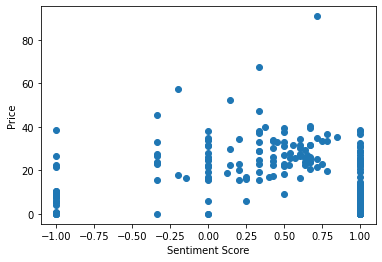

In [49]:
plt.scatter(df.polarity,df.eth_price)
plt.ylabel('Price')
plt.xlabel('Sentiment Score')

In [50]:
x = df[['polarity']]
y = df['eth_price'].values

In [51]:
model = LinearRegression().fit(x, y)

In [52]:
r2 = model.score(x, y)
r2

0.00201035833071872

In [53]:
x = df['polarity']
y = df['eth_price']

In [54]:
result = scipy.stats.linregress(x, y)
print(result.slope)
print(result.intercept)
print(result.rvalue)
print(result.pvalue)
print(result.stderr)

0.9729943528979675
18.885819739036894
0.044837019645813436
0.5211921961189037
1.5141178139143319


## b. Drop Sentiment Polarity = 0

In [55]:
df[(df.polarity == 0)].index.tolist()

[Timestamp('2018-02-16 00:00:00'),
 Timestamp('2018-08-28 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-02-11 00:00:00'),
 Timestamp('2021-02-20 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-03-03 00:00:00'),
 Timestamp('2021-03-04 00:00:00'),
 Timestamp('2021-03-13 00:00:00'),
 Timestamp('2021-03-22 00:00:00'),
 Timestamp('2021-03-29 00:00:00'),
 Timestamp('2021-03-30 00:00:00'),
 Timestamp('2021-04-27 00:00:00'),
 Timestamp('2021-05-26 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timestamp('2021-06-02 00:00:00'),
 Timestamp('2021-06-05 00:00:00'),
 Timestamp('2021-06-06 00:00:00'),
 Timestamp('2021-06-16 00:00:00')]

In [56]:
df =df.drop(index = df[(df.polarity == 0)].index.tolist())
df

,eth_price,Daily Return,Positive,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets,polarity
date,,,,,,,,
2017-08-14,0.375000,0.717636,1,0.0,1.0,0.0,1.0,-1.000000
2017-08-31,0.270000,0.173913,1,1.0,0.0,1.0,2.0,1.000000
2017-09-04,0.350000,0.750000,1,0.0,1.0,0.0,1.0,-1.000000
2017-09-19,0.500000,1.272727,1,1.0,0.0,0.0,1.0,1.000000
2017-11-28,0.130000,-0.135255,0,1.0,0.0,0.0,1.0,1.000000
...,...,...,...,...,...,...,...,...
2021-06-19,16.495000,0.070872,1,4.0,1.0,16.0,21.0,0.600000
2021-06-20,15.415000,-0.065474,0,1.0,2.0,9.0,12.0,-0.333333
2021-06-21,17.780000,0.153422,1,2.0,3.0,14.0,19.0,-0.200000


Text(0.5, 1.0, 'CryptoPunk Tweets Sentiment vs. Price')

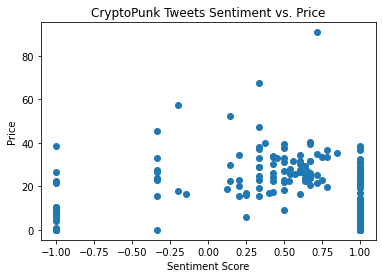

In [57]:
plt.scatter(df.polarity,df.eth_price)
plt.ylabel('Price')
plt.xlabel('Sentiment Score')
plt.title("CryptoPunk Tweets Sentiment vs. Price")

In [58]:
x = df[['polarity']]
y = df['eth_price'].values

In [59]:
model = LinearRegression().fit(x, y)

In [60]:
r2 = model.score(x, y)
r2

0.0037302502234004553

In [61]:
x = df['polarity']
y = df['eth_price']

In [62]:
result = scipy.stats.linregress(x, y)
print(result.slope)
print(result.intercept)
print(result.rvalue)
print(result.pvalue)
print(result.stderr)

1.3100232899461632
18.38376773612839
0.06107577443962757
0.4050583082492031
1.5697917199101472


In [63]:
m = result.slope
b = result.intercept

## c. Total Tweets Number with Sentiment Score

In [64]:
df = df.dropna()

In [65]:
df

,eth_price,Daily Return,Positive,sentiment_pos,sentiment_neg,sentiment_neu,total_tweets,polarity
date,,,,,,,,
2017-08-14,0.375000,0.717636,1,0.0,1.0,0.0,1.0,-1.000000
2017-08-31,0.270000,0.173913,1,1.0,0.0,1.0,2.0,1.000000
2017-09-04,0.350000,0.750000,1,0.0,1.0,0.0,1.0,-1.000000
2017-09-19,0.500000,1.272727,1,1.0,0.0,0.0,1.0,1.000000
2017-11-28,0.130000,-0.135255,0,1.0,0.0,0.0,1.0,1.000000
...,...,...,...,...,...,...,...,...
2021-06-19,16.495000,0.070872,1,4.0,1.0,16.0,21.0,0.600000
2021-06-20,15.415000,-0.065474,0,1.0,2.0,9.0,12.0,-0.333333
2021-06-21,17.780000,0.153422,1,2.0,3.0,14.0,19.0,-0.200000


Text(0.5, 0, 'Total Tweets Number')

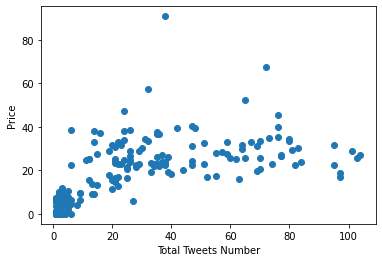

In [66]:
plt.scatter(df.total_tweets,df.eth_price)
plt.ylabel('Price')
plt.xlabel('Total Tweets Number')

In [67]:
x = df[['total_tweets']]
y = df['eth_price'].values

In [68]:
model = LinearRegression().fit(x, y)

In [69]:
r2 = model.score(x, y)
r2

0.3759417335252806

In [70]:
x = df['total_tweets']
y = df['eth_price']

In [71]:
result = scipy.stats.linregress(x, y)
print(result.slope)
print(result.intercept)
print(result.rvalue)
print(result.pvalue)
print(result.stderr)

0.31690604060273847
9.803826863705979
0.6131408757579946
8.535386153423243e-21
0.029938245520050172


## d. Total Tweets Number from 2017.06-2021.06

In [72]:
df2 = df2.dropna()

In [73]:
df2

,eth_price,Daily Return,Positive,total_tweets
date,,,,
2017-06-29,0.203404,1.083690,1,2.0
2017-06-30,0.285714,0.404661,1,0.0
2017-07-01,0.218439,-0.235463,0,0.0
2017-07-02,0.363645,0.664743,1,0.0
2017-07-03,0.538609,0.481139,1,1.0
...,...,...,...,...
2021-06-18,15.403333,-0.374749,0,9.0
2021-06-19,16.495000,0.070872,1,17.0
2021-06-20,15.415000,-0.065474,0,8.0


Text(0.5, 0, 'Tweets Number')

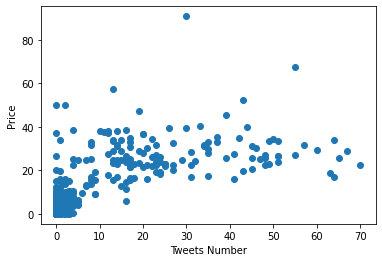

In [74]:
plt.scatter(df2.total_tweets,df2.eth_price)
plt.ylabel('Price')
plt.xlabel('Tweets Number')

In [75]:
x = df2[['total_tweets']]
y = df2['eth_price'].values

In [76]:
model = LinearRegression().fit(x, y)

In [77]:
r2 = model.score(x, y)
r2

0.5620519697728819

In [78]:
x = df2['total_tweets']
y = df2['eth_price']

In [79]:
x.corr(y)

0.7497012536823467

In [80]:
result = scipy.stats.linregress(x, y)
print(result.slope)
print(result.intercept)
print(result.rvalue)
print(result.pvalue)
print(result.stderr)

0.7134355319175165
2.533971912620343
0.7497012536823467
5.014565976479922e-175
0.020283330620234612


In [81]:
m = result.slope
b = result.intercept

Text(0.5, 1.0, 'CryptoPunk Daily Tweets Number vs. Price')

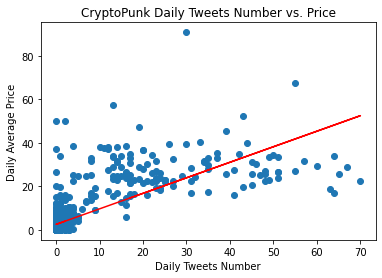

In [82]:
plt.scatter(df2.total_tweets,df2.eth_price)
plt.ylabel('Daily Average Price')
plt.xlabel('Daily Tweets Number')
plt.plot(df2.total_tweets, m*x+b, color='red')
plt.title("CryptoPunk Daily Tweets Number vs. Price")